<a href="https://colab.research.google.com/github/vsemwal/Deep_Learning_MANIT/blob/master/Different_Activation_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-6, 6, 0.1)


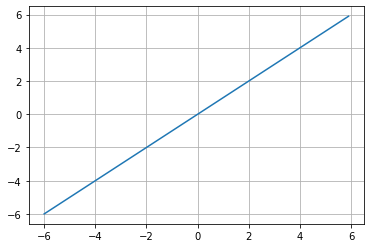

In [0]:
def linear(x):
    a = []
    for item in x:
        a.append(item)
    return a
y = linear(x)
plt.plot(x,y)
plt.grid()
plt.show()

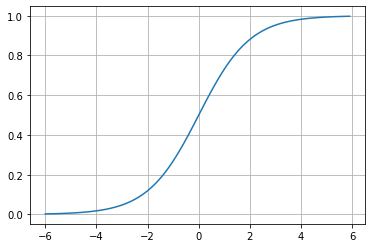

In [0]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

y = sigmoid(x)
plt.plot(x,y)
plt.grid()
plt.show()

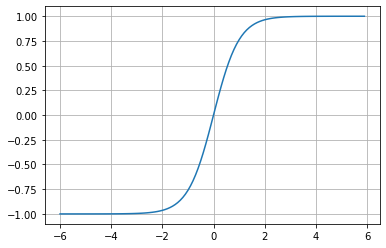

In [0]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)


y = tanh(x)

plt.plot(x,y)
plt.grid()
plt.show()

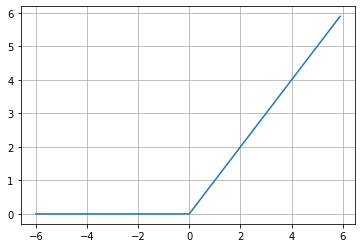

In [0]:
def relu(x):
    a = []
    for item in x:
        if item > 0:
            a.append(item)
        else:
            a.append(0)
    return a


y = relu(x)

plt.plot(x,y)
plt.grid()
plt.show()

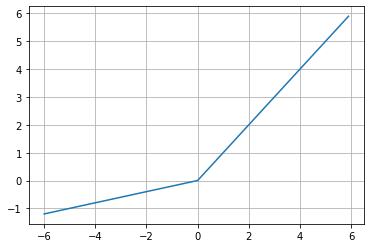

In [0]:
def LeakyRelu(x):
    a = []
    for item in x:
        if item > 0:
            a.append(item)
        else:
            alpha=.2
            a.append((item*alpha))
    return a


y = LeakyRelu(x)

plt.plot(x,y)
plt.grid()
plt.show()

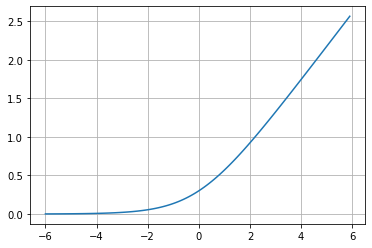

In [0]:
def SoftPlus(x):
    a = []
    for item in x:
        a.append(math.log10(math.exp(item)+1))
    return a


y = SoftPlus(x)

plt.plot(x,y)
plt.grid()
plt.show()

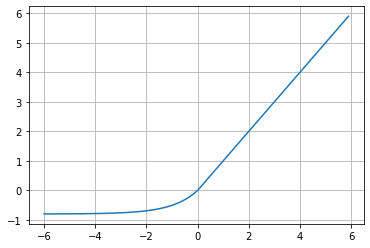

In [0]:
def ELU(x):
    a = []
    for item in x:
        if item > 0:
            a.append(item)
        else:
            alpha=.8
            a.append((alpha*(math.exp(item)-1)))
    return a


y = ELU(x)

plt.plot(x,y)
plt.grid()
plt.show()

In [0]:
import keras
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = train_images.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

from keras.utils import to_categorical

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import sgd

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.summary()

batch_size = 100
num_classes = 10
epochs=5

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 22us/step
Test loss: 1.2916580711364747
Test accuracy: 0.7332000136375427


In [0]:
#Relu
batch_size = 100
num_classes = 10
epochs=5

model2 = Sequential()
model2.add(Dense(10, activation='relu', input_shape=(784,)))
model2.add(Dense(10, activation='softmax'))


model2.summary()


model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

test_loss, test_acc = model2.evaluate(x_test, y_test)

print('Model2 - Test loss:', test_loss)
print('Model2 - Test accuracy:', test_acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 21us/step
Model2 - Test loss: 0.3766673178792
Model2 - Test accuracy: 0.8953999876976013


In [0]:
model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(784,)))
model3.add(Dense(10, activation='softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
 
epochs = 10
model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

test_loss, test_acc = model3.evaluate(x_test, y_test)

print('Model3 - Test loss:', test_loss)
print('Model3 - Test accuracy:', test_acc)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 48us/step
Model3 - Test loss: 0.24502086644470691
Model3 - Test accuracy: 0.9323999881744385
